In [38]:
# imported packages

import random
import glob
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import math
import matplotlib.ticker as plticker
import bisect
import copy
import json
import csv
import ast
import time
from scipy import special

In [39]:
#  define the colors from colorbrewer2
orange1 = '#feedde'
orange2 = '#fdbe85'
orange3 = '#fd8d3c'
orange4 = '#e6550d'
orange5 = '#a63603'
blue1 = '#eff3ff'
blue2 = '#bdd7e7'
blue3 = '#6baed6'
blue4 = '#3182bd'
blue5 = '#08519c'
green1 = '#edf8e9'
green2 = '#bae4b3'
green3 = '#74c476'
green4 = '#31a354'
green5 = '#006d2c'
grey1 = '#f7f7f7'
grey2 = '#cccccc'
grey3 = '#969696'
grey4 = '#636363'
grey5 = '#252525'
purple1 = '#f2f0f7'
purple2 = '#cbc9e2'
purple3 = '#9e9ac8'
purple4 = '#756bb1'
purple5 = '#54278f'
red1 = '#fee5d9'
red2 = '#fcae91'
red3 = '#fb6a4a'
red4 = '#de2d26'
red5 = '#a50f15'


# Import a single k-hit trajectory

In [40]:
import json
import operator
import glob as glob
unordered_files = glob.glob('AML_cumulative_risk//05082023_full_history_of_successful_events//history_4//clonal_architecture_at_time_*.txt')
files_dict={}
for f in unordered_files:
    first_split = f.split('_')[12]
    gen = float(first_split.split('.')[0])*0.1
    files_dict[gen]=f
file_tuples = sorted(files_dict.items(), key=lambda kv: kv[0])
files = []
for k, v in file_tuples:
    files.append(v)
 

N=10**5
vector_of_time = []
reinterpreted_dict = {}
for file in files:
    first_split = file.split('_')[12]
    generation_time = float(first_split.split('.')[0])*0.1
    vector_of_time.append(generation_time)
    with open(file) as f:
        data = f.read()
        js = json.loads(data)[0]
        list_of_mutants = js['value']
#         print(generation_time, list_of_mutants )
        for mutant in list_of_mutants:
#             print('mutant', mutant)
            mutant_ID = mutant[0]
            size = mutant[1]
            fraction = size/N
            if str(mutant_ID) in reinterpreted_dict.keys():
                tmp = reinterpreted_dict[str(mutant_ID)]
                tmp[generation_time]=fraction
            else:
                reinterpreted_dict[str(mutant_ID)] = {generation_time:fraction}

# reinterpreted_dict_sorted = {}
# for key in sorted(reinterpreted_dict.keys()):
#     reinterpreted_dict_sorted[key] = reinterpreted_dict[key]
# print(sorted(reinterpreted_dict.keys()))


In [41]:
def searching_the_main_branch_mutant_ID(reinterpreted_dict):
    
    list_of_mutant_IDs = []
    blast_genotype = list(reinterpreted_dict.keys())[-1]
    print(blast_genotype)
    for mutant_ID in list(reinterpreted_dict.keys()):
        if mutant_ID[1:-1] in blast_genotype[1:-1]:
            print('n', mutant_ID)
            list_of_mutant_IDs.append(mutant_ID[1:-1])
            
    return list_of_mutant_IDs

In [42]:
searching_the_main_branch_mutant_ID(reinterpreted_dict)

[[0, 'WT', 0.0, 0], [648262, 'LoF', 0.15], [648283, 'LoF', 0.15], [648301, 'LoF', 0.15], [648325, 'LoF', 0.15]]
n [[0, 'WT', 0.0, 0]]
n [[0, 'WT', 0.0, 0], [648262, 'LoF', 0.15]]
n [[0, 'WT', 0.0, 0], [648262, 'LoF', 0.15], [648283, 'LoF', 0.15]]
n [[0, 'WT', 0.0, 0], [648262, 'LoF', 0.15], [648283, 'LoF', 0.15], [648301, 'LoF', 0.15]]
n [[0, 'WT', 0.0, 0], [648262, 'LoF', 0.15], [648283, 'LoF', 0.15], [648301, 'LoF', 0.15], [648325, 'LoF', 0.15]]


["[0, 'WT', 0.0, 0]",
 "[0, 'WT', 0.0, 0], [648262, 'LoF', 0.15]",
 "[0, 'WT', 0.0, 0], [648262, 'LoF', 0.15], [648283, 'LoF', 0.15]",
 "[0, 'WT', 0.0, 0], [648262, 'LoF', 0.15], [648283, 'LoF', 0.15], [648301, 'LoF', 0.15]",
 "[0, 'WT', 0.0, 0], [648262, 'LoF', 0.15], [648283, 'LoF', 0.15], [648301, 'LoF', 0.15], [648325, 'LoF', 0.15]"]

In [35]:
def plot_waiting_times_for_mains_only_indexed(m, reinterpreted_dict):  
    
    main_branch_IDs = searching_the_main_branch_mutant_ID(reinterpreted_dict)
    i=0
    for mutant, map_gen_to_size in reinterpreted_dict.items():
        
        if mutant[1:-1] in main_branch_IDs:
        
            map_gen_to_size_sorted = {}
            for key in sorted(map_gen_to_size.keys()):
                map_gen_to_size_sorted[key] = map_gen_to_size[key]
            incomplete_trajectory = list(map_gen_to_size_sorted.values())
            y_vector = list(map_gen_to_size_sorted.keys())
    #         print('y_vector ',y_vector)
            diff = len(vector_of_time) - len(incomplete_trajectory)
            if diff != 0:
                sharpened_trajectory = [1/10**5] + incomplete_trajectory
                sharpened_y_vector = [y_vector[0]-0.1]+y_vector
                ax1[m].plot(sharpened_y_vector, np.log(sharpened_trajectory), color = color_list[i])
                print( mutant[1:-1], 'diff', diff)
            else:
                ax1[m].plot(y_vector, np.log(incomplete_trajectory), color = color_list[i])
    #         print('y_vector', y_vector, '\n complete_trajectory',  complete_trajectory)
            
                
            i+=1
#     ax1[m].fill_between([0, 80], [np.log(1/1000),np.log(1/1000)], [np.log(1/20),np.log(1/20)], color = grey1)

#     print('bin_centres', bin_centres)
#     ax1[m].set_xlabel('age', fontsize = 15)
    x_major_ticks =   [20,40,60,80,100]
    x_major_tick_labels =  [20,40,60,80,100]
    ax1[m].set_xticks(x_major_ticks)
    ax1[m].set_xticklabels(x_major_tick_labels, fontsize = 15)
    ax1[m].xaxis.set_tick_params(width=1, length = 6)
    ax1[m].set_xlim(0, 70)

    ax1[m].set_ylabel('cell fraction', fontsize = 15, labelpad = 6*scale, fontweight = 'medium')
    y_major_ticks =   [np.log(10**-5),np.log(10**-4),np.log(10**-3),np.log(10**-2),np.log(10**-1),np.log(10**0)]
    y_major_tick_labels =  ['$10^{-5}$', '$10^{-4}$', '$10^{-3}$', '$10^{-2}$','$10^{-1}$', '$10^{0}$  ']
    ax1[m].set_yticks(y_major_ticks)
    ax1[m].set_yticklabels(y_major_tick_labels, fontsize = 15)
    ax1[m].yaxis.set_tick_params(width=1, length = 6)
    ax1[m].set_ylim(np.log(10**-5), None)

    ax1[m].spines['top'].set_visible(False)
    ax1[m].spines['right'].set_visible(False)
    #     ax1.spines['bottom'].set_visible(False)

    for axis in ['bottom','left']:
        ax1[m].spines[axis].set_linewidth(1.5)

    for axis in ['bottom','left']:
        ax1[m].spines[axis].set_color(grey3)

    ax1[m].legend(loc='center', bbox_to_anchor=(1, 0.75), frameon=0, fontsize = 15)

#     print(widths, normed_value)

    return ax1[m]


# Cumulative distribution of mutation occurrence time conditioned on 4-hit 

In [28]:
# with conditioning: 101 bins, running till age 70 only
cum_hist_t1_60_80 = [0,0.68812589, 0.91058655, 0.9713877,  0.98712446, 0.99785408, 0.99928469,
 1.   ,      1.   ,      1.    ,     1.  ,       1.  ,       1.,
 1.    ,     1.   ,      1.    ,     1.  ,       1.  ,       1.,
 1.    ,     1.   ,      1.    ,     1.  ,       1.  ,       1.,
 1.    ,     1.   ,      1.    ,     1.  ,       1.  ,       1.,
 1.    ,     1.   ,      1.    ,     1.  ,       1.  ,       1.,
 1.    ,     1.   ,      1.    ,     1.  ,       1.  ,       1.,
 1.     ,    1.   ,      1.    ,     1.  ,       1.  ,       1.,
 1.    ,     1.   ,      1.    ,     1.  ,       1.  ,       1.,
 1.    ,     1.   ,      1.    ,     1.  ,       1.  ,       1.,
 1.    ,     1.   ,      1.    ,     1.  ,       1.  ,       1.,
 1.    ,     1.   ,      1.    ,     1.  ,       1.  ,       1.,
 1.    ,     1.   ,      1.    ,     1.  ,       1.  ,       1.,
 1.    ,     1.   ,      1.    ,     1.  ,       1.  ,       1.,
 1.    ,     1.   ,      1.    ,     1.  ,       1.  ,       1.,
 1.    ,     1.   ,      1.    ,     1.  ,       1.  ,       1.,
 1.    ,     1.   ,      1.    ,     1.        ]

cum_hist_t2_60_80 = [0,7.15307582e-04, 4.29184549e-03, 7.15307582e-03, 1.07296137e-02,
 2.28898426e-02, 3.14735336e-02, 4.86409156e-02, 6.22317597e-02,
 7.51072961e-02, 9.15593705e-02, 1.04434907e-01, 1.28040057e-01,
 1.53075823e-01, 1.84549356e-01, 2.11731044e-01, 2.41058655e-01,
 2.68240343e-01, 2.96852647e-01, 3.27610873e-01, 3.58369099e-01,
 3.95565093e-01, 4.35622318e-01, 4.68526466e-01, 4.95708155e-01,
 5.35765379e-01, 5.65092990e-01, 6.13018598e-01, 6.45207439e-01,
 6.86695279e-01, 7.17453505e-01, 7.50357654e-01, 7.79685265e-01,
 8.02575107e-01, 8.29041488e-01, 8.47639485e-01, 8.62660944e-01,
 8.82689557e-01, 9.07010014e-01, 9.24892704e-01, 9.44206009e-01,
 9.57081545e-01, 9.64234621e-01, 9.73533619e-01, 9.77110157e-01,
 9.82117310e-01, 9.85693848e-01, 9.88555079e-01, 9.92846924e-01,
 9.95708155e-01, 9.98569385e-01, 9.99284692e-01, 9.99284692e-01,
 1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
 1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
 1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
 1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
 1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
 1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
 1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
 1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
 1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
 1.00000000e+00, 1.00000000e+00 ,1.00000000e+00, 1.00000000e+00,
 1.00000000e+00, 1.00000000e+00 ,1.00000000e+00, 1.00000000e+00,
 1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00]

cum_hist_t3_60_80 = [0,0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
 0.00000000e+00, 0.00000000e+00, 7.15307582e-04, 7.15307582e-04,
 7.15307582e-04, 1.43061516e-03, 2.14592275e-03, 2.86123033e-03,
 4.29184549e-03, 6.43776824e-03, 1.43061516e-02, 1.78826896e-02,
 2.14592275e-02, 2.64663805e-02, 3.79113019e-02, 4.50643777e-02,
 6.00858369e-02, 7.43919886e-02, 9.01287554e-02, 1.14449213e-01,
 1.40200286e-01, 1.65236052e-01, 1.95278970e-01, 2.29613734e-01,
 2.67525036e-01, 2.96852647e-01, 3.26895565e-01, 3.64806867e-01,
 4.04148784e-01, 4.43490701e-01, 4.89985694e-01, 5.38626609e-01,
 5.81545064e-01, 6.20886981e-01, 6.63805436e-01, 7.19599428e-01,
 7.56795422e-01, 7.93991416e-01, 8.24749642e-01, 8.58369099e-01,
 8.84120172e-01, 9.05579399e-01, 9.25608011e-01, 9.34907010e-01,
 9.53505007e-01, 9.66380544e-01, 9.76394850e-01, 9.80686695e-01,
 9.87124464e-01, 9.87839771e-01, 9.91416309e-01, 9.93562232e-01,
 9.97138770e-01, 9.97854077e-01, 9.97854077e-01, 9.99284692e-01,
 1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
 1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
 1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
 1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
 1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
 1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
 1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
 1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00]

bin_centres = [ 0, 0.5 , 1.5 , 2.5 , 3.5 , 4.5 , 5.5,  6.5,  7.5,  8.5,  9.5, 10.5, 11.5, 12.5, 13.5,
 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5, 22.5, 23.5, 24.5, 25.5, 26.5, 27.5,
 28.5, 29.5, 30.5, 31.5, 32.5, 33.5, 34.5, 35.5, 36.5, 37.5, 38.5, 39.5, 40.5, 41.5,
 42.5, 43.5, 44.5, 45.5, 46.5, 47.5, 48.5, 49.5, 50.5, 51.5, 52.5, 53.5, 54.5, 55.5,
 56.5, 57.5, 58.5, 59.5, 60.5, 61.5, 62.5, 63.5, 64.5, 65.5, 66.5, 67.5, 68.5, 69.5,
 70.5, 71.5, 72.5, 73.5, 74.5, 75.5, 76.5, 77.5, 78.5, 79.5, 80.5, 81.5, 82.5, 83.5,
 84.5, 85.5, 86.5, 87.5, 88.5, 89.5, 90.5, 91.5, 92.5, 93.5, 94.5, 95.5, 96.5, 97.5,
 98.5, 99.5]

# Cumulative distribution of mutation occurrence time

In [29]:
# no conditioning: 201 bins, running till age 70 only

cum_hist_t1_no_conditioning = [0,0.33130292, 0.59470176, 0.75510478, 0.85287132, 0.91068076, 0.94627054,
 0.96791557, 0.98069187, 0.98814313, 0.99281692, 0.99538367, 0.9972417,
 0.99837183, 0.99898479, 0.9994062,  0.99963606, 0.9997893,  0.99990423,
 0.99992338, 0.99996169, 0.99996169, 0.99996169, 0.99996169, 0.99998085,
 0.99998085, 0.99998085, 1.    ,     1.    ,     1.   ,      1.,
 1.    ,     1.    ,     1.    ,     1.    ,     1.    ,     1.,
 1.    ,     1.    ,     1.    ,     1.    ,     1.     ,    1.,
 1.    ,     1.    ,     1.    ,     1.    ,     1.      ,   1.,
 1.    ,     1.    ,     1.    ,     1.    ,     1.   ,      1.,
 1.    ,     1.    ,     1.     ,    1.    ,     1.    ,     1.,
 1.    ,     1.    ,     1.    ,     1.    ,     1.    ,     1.,
 1.    ,     1.    ,     1.    ,     1.    ,     1.    ,     1.,
 1.    ,     1.    ,     1.    ,     1.    ,     1.    ,     1.,
 1.    ,     1.    ,     1.    ,     1.    ,     1.    ,     1.,
 1.    ,     1.    ,     1.    ,     1.    ,     1.    ,     1.,
 1.    ,     1.    ,     1.    ,     1.    ,     1.    ,     1.,
 1.    ,     1.    ,     1.    ,     1.    ,     1.    ,     1.,
 1.    ,     1.    ,     1.    ,     1.    ,     1.    ,     1.,
 1.    ,     1.    ,     1.    ,     1.    ,     1.    ,     1.,
 1.    ,     1.    ,     1.    ,     1.    ,     1.    ,     1.,
 1.    ,     1.    ,     1.    ,     1.    ,     1.    ,     1.,
 1.    ,     1.    ,     1.    ,     1.    ,     1.    ,     1.,
 1.    ,     1.    ,     1.    ,     1.     ,    1.    ,     1.,
 1.    ,     1.    ,     1.    ,     1.    ,     1.    ,     1.,
 1.    ,     1.    ,     1.    ,     1.    ,     1.    ,     1.,
 1.    ,     1.    ,     1.    ,     1.    ,     1.    ,     1.,
 1.    ,     1.    ,     1.    ,     1.    ,     1.    ,     1.,
 1.    ,     1.    ,     1.    ,     1.    ,     1.    ,     1.,
 1.    ,     1.    ,     1.    ,     1.    ,     1.    ,     1.,
 1.    ,     1.    ,     1.    ,     1.    ,     1.    ,     1.,
 1.    ,     1.    ,     1.    ,     1.    ,     1.    ,     1.,
 1.    ,     1.    ,     1.    ,     1.    ,     1.    ,     1.,
 1.    ,     1.    ,     1.    ,     1.    ,     1.    ,     1.,
 1.    ,     1.        ]

cum_hist_t2_no_conditioning =  [0,0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
 1.73328249e-05, 3.46656498e-05, 5.19984747e-05, 5.19984747e-05,
 6.93312996e-05, 8.66641245e-05, 1.55995424e-04, 1.73328249e-04,
 1.90661074e-04, 2.07993899e-04, 3.11990848e-04, 3.46656498e-04,
 4.50653447e-04, 5.71983222e-04, 6.93312996e-04, 7.62644296e-04,
 8.31975595e-04, 9.53305370e-04, 1.09196797e-03, 1.28262904e-03,
 1.45595729e-03, 1.71594967e-03, 1.94127639e-03, 2.13193746e-03,
 2.46126114e-03, 2.66925504e-03, 2.99857871e-03, 3.39723368e-03,
 3.70922453e-03, 4.05588103e-03, 4.50653447e-03, 4.92252227e-03,
 5.28651160e-03, 5.58116962e-03, 6.18781849e-03, 6.74246889e-03,
 7.27978646e-03, 7.93843381e-03, 8.87440635e-03, 9.53305370e-03,
 1.04343606e-02, 1.12490034e-02, 1.22196416e-02, 1.32596111e-02,
 1.41089195e-02, 1.52702187e-02, 1.63448539e-02, 1.77834784e-02,
 1.91701043e-02, 2.08340555e-02, 2.24633411e-02, 2.41792907e-02,
 2.57912435e-02, 2.77845183e-02, 2.96391306e-02, 3.19617291e-02,
 3.43363261e-02, 3.70229140e-02, 3.96228377e-02, 4.25694180e-02,
 4.57413249e-02, 4.91732243e-02, 5.21544701e-02, 5.53783756e-02,
 5.93302596e-02, 6.29528201e-02, 6.68700385e-02, 7.12552432e-02,
 7.61777655e-02, 8.11696190e-02, 8.58668146e-02, 9.09106666e-02,
 9.62145110e-02, 1.01327694e-01, 1.06874198e-01, 1.12230041e-01,
 1.18625854e-01, 1.25160329e-01, 1.31521475e-01, 1.38315943e-01,
 1.45769057e-01, 1.52910181e-01, 1.60103304e-01, 1.67296426e-01,
 1.74073561e-01, 1.81492010e-01, 1.89170451e-01, 1.97282213e-01,
 2.05203314e-01, 2.13349742e-01, 2.21444171e-01, 2.29157278e-01,
 2.37529032e-01, 2.45658127e-01, 2.53579228e-01, 2.61777655e-01,
 2.70669394e-01, 2.78503831e-01, 2.87308906e-01, 2.96217978e-01,
 3.04884390e-01, 3.13464138e-01, 3.22893195e-01, 3.32235588e-01,
 3.40763338e-01, 3.48927098e-01, 3.56484210e-01, 3.64422644e-01,
 3.72967726e-01, 3.81374146e-01, 3.89728568e-01, 3.98221652e-01,
 4.07096059e-01, 4.14965161e-01, 4.23163587e-01, 4.30790030e-01,
 4.38000485e-01, 4.45886921e-01, 4.53704025e-01, 4.60949145e-01,
 4.68159601e-01, 4.75387389e-01, 4.81939196e-01, 4.89634971e-01,
 4.97122751e-01, 5.04679863e-01, 5.11231671e-01, 5.17818144e-01,
 5.24699275e-01, 5.31389746e-01, 5.38270877e-01, 5.44545360e-01,
 5.51478490e-01, 5.57562312e-01, 5.63750130e-01, 5.69556626e-01,
 5.70804590e-01, 5.70804590e-01, 5.70804590e-01, 5.70804590e-01,
 5.70804590e-01, 5.70804590e-01, 5.70804590e-01, 5.70804590e-01,
 5.70804590e-01, 5.70804590e-01, 5.70804590e-01, 5.70804590e-01,
 5.70804590e-01, 5.70804590e-01, 5.70804590e-01, 5.70804590e-01,
 5.70804590e-01, 5.70804590e-01, 5.70804590e-01, 5.70804590e-01,
 5.70804590e-01, 5.70804590e-01, 5.70804590e-01, 5.70804590e-01,
 5.70804590e-01, 5.70804590e-01, 5.70804590e-01, 5.70804590e-01,
 5.70804590e-01, 5.70804590e-01, 5.70804590e-01, 5.70804590e-01,
 5.70804590e-01, 5.70804590e-01, 5.70804590e-01, 5.70804590e-01,
 5.70804590e-01, 5.70804590e-01, 5.70804590e-01, 5.70804590e-01,
 5.70804590e-01, 5.70804590e-01, 5.70804590e-01, 5.70804590e-01,
 5.70804590e-01, 5.70804590e-01, 5.70804590e-01, 5.70804590e-01,
 5.70804590e-01, 5.70804590e-01, 5.70804590e-01, 5.70804590e-01,
 5.70804590e-01, 5.70804590e-01, 5.70804590e-01, 5.70804590e-01,
 5.70804590e-01, 5.70804590e-01, 5.70804590e-01, 5.70804590e-01]

cum_hist_t3_no_conditioning =  [0,0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
 0.00000000e+00 ,0.00000000e+00, 1.73328249e-05, 1.73328249e-05,
 1.73328249e-05, 1.73328249e-05, 1.73328249e-05, 1.73328249e-05,
 1.73328249e-05, 1.73328249e-05, 1.73328249e-05, 5.19984747e-05,
 5.19984747e-05, 5.19984747e-05, 5.19984747e-05, 5.19984747e-05,
 5.19984747e-05, 5.19984747e-05, 5.19984747e-05, 5.19984747e-05,
 6.93312996e-05, 6.93312996e-05, 1.03996949e-04, 1.73328249e-04,
 1.73328249e-04, 1.90661074e-04, 2.25326724e-04, 2.25326724e-04,
 2.42659549e-04, 2.42659549e-04, 2.59992374e-04, 2.59992374e-04,
 2.59992374e-04, 2.77325198e-04, 2.94658023e-04, 3.29323673e-04,
 3.29323673e-04, 3.29323673e-04, 3.46656498e-04, 3.46656498e-04,
 3.63989323e-04, 3.81322148e-04, 4.67986272e-04, 6.06648872e-04,
 6.41314521e-04, 7.45311471e-04, 8.31975595e-04, 8.83974070e-04,
 9.53305370e-04, 1.05730232e-03, 1.12663362e-03, 1.23063057e-03,
 1.33462752e-03, 1.47329012e-03, 1.52528859e-03, 1.59461989e-03,
 1.69861684e-03, 1.87194509e-03, 1.92394356e-03, 2.07993899e-03,
 2.28793289e-03, 2.46126114e-03, 2.54792526e-03, 2.80791763e-03,
 3.11990848e-03, 3.22390543e-03, 3.34523521e-03, 3.65722605e-03,
 3.89988560e-03, 4.09054668e-03, 4.22920928e-03, 4.43720318e-03,
 4.74919402e-03, 4.97452075e-03, 5.32117725e-03, 5.52917114e-03,
 5.91049329e-03, 6.29181544e-03, 6.69047041e-03, 7.15845669e-03,
 7.41844906e-03, 7.71310708e-03, 8.25042465e-03, 8.75307658e-03,
 9.16906437e-03, 9.70638195e-03, 1.01743682e-02, 1.07463514e-02,
 1.12836690e-02, 1.18209866e-02, 1.22543072e-02, 1.26702950e-02,
 1.28089576e-02, 1.28089576e-02, 1.28089576e-02, 1.28089576e-02,
 1.28089576e-02, 1.28089576e-02, 1.28089576e-02, 1.28089576e-02,
 1.28089576e-02, 1.28089576e-02, 1.28089576e-02, 1.28089576e-02,
 1.28089576e-02, 1.28089576e-02, 1.28089576e-02, 1.28089576e-02,
 1.28089576e-02, 1.28089576e-02, 1.28089576e-02, 1.28089576e-02,
 1.28089576e-02, 1.28089576e-02, 1.28089576e-02, 1.28089576e-02,
 1.28089576e-02, 1.28089576e-02, 1.28089576e-02, 1.28089576e-02,
 1.28089576e-02, 1.28089576e-02, 1.28089576e-02, 1.28089576e-02,
 1.28089576e-02, 1.28089576e-02, 1.28089576e-02, 1.28089576e-02,
 1.28089576e-02, 1.28089576e-02, 1.28089576e-02, 1.28089576e-02,
 1.28089576e-02, 1.28089576e-02, 1.28089576e-02, 1.28089576e-02,
 1.28089576e-02, 1.28089576e-02, 1.28089576e-02, 1.28089576e-02,
 1.28089576e-02, 1.28089576e-02, 1.28089576e-02, 1.28089576e-02,
 1.28089576e-02, 1.28089576e-02, 1.28089576e-02, 1.28089576e-02,
 1.28089576e-02, 1.28089576e-02, 1.28089576e-02, 1.28089576e-02]

bin_centres_no_conditioning = [0, 0.25,  0.75,  1.25,  1.75,  2.25,  2.75,  3.25,  3.75,  4.25,  4.75,  5.25,  5.75,
  6.25,  6.75,  7.25,  7.75,  8.25,  8.75,  9.25,  9.75, 10.25, 10.75, 11.25, 11.75,
 12.25, 12.75, 13.25, 13.75, 14.25, 14.75, 15.25, 15.75, 16.25, 16.75, 17.25, 17.75,
 18.25, 18.75, 19.25, 19.75, 20.25, 20.75, 21.25, 21.75, 22.25, 22.75, 23.25, 23.75,
 24.25, 24.75, 25.25, 25.75, 26.25, 26.75, 27.25, 27.75, 28.25, 28.75, 29.25, 29.75,
 30.25, 30.75, 31.25, 31.75, 32.25, 32.75, 33.25, 33.75, 34.25, 34.75, 35.25, 35.75,
 36.25, 36.75, 37.25, 37.75, 38.25, 38.75, 39.25, 39.75, 40.25, 40.75, 41.25, 41.75,
 42.25, 42.75, 43.25, 43.75, 44.25, 44.75, 45.25, 45.75, 46.25, 46.75, 47.25, 47.75,
 48.25, 48.75, 49.25, 49.75, 50.25, 50.75, 51.25, 51.75, 52.25, 52.75, 53.25, 53.75,
 54.25, 54.75, 55.25, 55.75, 56.25, 56.75, 57.25, 57.75, 58.25, 58.75, 59.25, 59.75,
 60.25, 60.75, 61.25, 61.75, 62.25, 62.75, 63.25, 63.75, 64.25, 64.75, 65.25, 65.75,
 66.25, 66.75, 67.25, 67.75, 68.25, 68.75, 69.25, 69.75, 70.25, 70.75, 71.25, 71.75,
 72.25, 72.75, 73.25, 73.75, 74.25, 74.75, 75.25, 75.75, 76.25, 76.75, 77.25, 77.75,
 78.25, 78.75, 79.25, 79.75, 80.25, 80.75, 81.25, 81.75, 82.25, 82.75, 83.25, 83.75,
 84.25, 84.75, 85.25, 85.75, 86.25, 86.75, 87.25, 87.75, 88.25, 88.75, 89.25, 89.75,
 90.25, 90.75, 91.25, 91.75, 92.25, 92.75, 93.25, 93.75, 94.25, 94.75, 95.25, 95.75,
 96.25, 96.75, 97.25, 97.75, 98.25, 98.75, 99.25, 99.75]

# Plot 5D 

In [8]:
list_of_abs_risk_single_khitlessthan70_finegrained = [6.947917627959635e-05, 0.0, 0, 0, 0, 0, 0, 0, 0, 0]
list_of_abs_risk_double_khitlessthan70_finegrained = [0.00708430007733952, 0.0029179877735194286, 0.0010061495258332645, 0.0002120956330162537, 2.208560162398274e-05, 1.573342637839641e-06, 0.0, 0.0, 0, 0]
list_of_abs_risk_triple_khitlessthan70_finegrained_merged = [0.24929178470254956, 0.1657720891824938, 0.08437471495028732, 0.0319819915479199, 0.004437460149804533, 0.00020284788412126798, 0.0, 0, 0]


In [32]:
def plot_waiting_times(m, bins_t1, bins_t2, bins_t3, cum_hist_t1,cum_hist_t2,cum_hist_t3):  
    

    ax1[m].plot(bins_t1, cum_hist_t1, label = '$t_1$ ', color = '#e6550d')
    ax1[m].fill_between(bins_t1, cum_hist_t1, [0]*(len(bins_t1)),  color = '#fed9a6')
    

    ax1[m].plot(bins_t2, cum_hist_t2, label = '$t_2$ ', color = '#2ca25f')
    ax1[m].fill_between(bins_t2, cum_hist_t2, [0]*(len(bins_t2)), color = '#cee6c5')
#     print('list_of_t2', cum_hist)


    ax1[m].fill_between(bins_t3, cum_hist_t3, [0]*(len(bins_t3)), color = '#decbe4')
#     print('list_of_t3', cum_hist)
    ax1[m].plot(bins_t3, cum_hist_t3,  label = '$t_3$ ', color = '#756bb1')


#     print('bin_centres', bin_centres)
#     ax1[m].set_xlabel('age', fontsize = 15)
    x_major_ticks =   [20,40,60,80,100]
    x_major_tick_labels =  [20,40,60,80,100]
    ax1[m].set_xticks(x_major_ticks)
    ax1[m].set_xticklabels(x_major_tick_labels, fontsize = 15)
    ax1[m].xaxis.set_tick_params(width=1, length = 6)
    ax1[m].set_xlim(0, 70)

    ax1[m].set_ylabel('cumulative probability', fontsize = 15, labelpad = 6*scale, fontweight = 'medium')
    y_major_ticks =   [0,0.2,0.4,0.6,0.8,1]
    y_major_tick_labels =  ['0  ','0.2','0.4','0.6','0.8','1  ']
    ax1[m].set_yticks(y_major_ticks)
    ax1[m].set_yticklabels(y_major_tick_labels, fontsize = 15)
    ax1[m].yaxis.set_tick_params(width=1, length = 6)
    ax1[m].set_ylim(0, 1)


#     print(widths, normed_value)

    return ax1


In [33]:
from scipy.interpolate import interp1d
from scipy.interpolate import CubicSpline
from scipy.interpolate import InterpolatedUnivariateSpline

def plot_log_hist_data_for_fouth_hit_abs_risk_interpolated(m, list_of_abs_risk_single_khitlessthan70, list_of_abs_risk_double_khitlessthan70, list_of_abs_risk_triple_khitlessthan70_merged):
    
    def perform_logarithmic(list_of_risk):
        
        resultant_list = []
        for c in list_of_risk:
            
            if c != 0:
                outcome = np.log(c)
            else:
                outcome = np.log(0.00000001)
                
            resultant_list.append(outcome)        
        
        return resultant_list
    
#     ax1[m].fill_between(cumulative_by_age, np.log(female_epidemiological_risk), np.log(male_epidemiological_risk), color = grey2)
    
    list_of_time = [5, 15,25,35,45,55,65]
    list_of_finer_time = [5,10, 15,20,25,30,35,40,45,50,55,60,65]
    list_of_finer_time = range(66)[5::]
    
    list_of_time_modified =  [10,25,35,45,55,65,70]
    list_of_finer_time_modified = range(70)[10::]
    list_of_risk_single_log_upper = perform_logarithmic(list_of_abs_risk_single_khitlessthan70[0:7])
    interp_func_single = interp1d(list_of_time, list_of_risk_single_log_upper)
#     ax1[m].plot(list_of_time, list_of_risk_single_log_upper, color = '#e6550d')
    ax1[m].plot(list_of_finer_time, interp_func_single(list_of_finer_time), color = '#e6550d')
    
    list_of_risk_double_log_upper = perform_logarithmic(list_of_abs_risk_double_khitlessthan70[0:7])
    interp_func_double = interp1d(list_of_time, list_of_risk_double_log_upper)
#     ax1[m].plot(list_of_time, list_of_risk_double_log_upper,  color = '#2ca25f')
    ax1[m].plot(list_of_finer_time, interp_func_double(list_of_finer_time),  color = '#2ca25f')
#     print('list_of_finer_time', list_of_finer_time)
#     print('intrapolation', interp_func_double(list_of_finer_time))
    
    list_of_risk_triple_log_upper = perform_logarithmic(list_of_abs_risk_triple_khitlessthan70_merged[0:7])
    interp_func_triple = interp1d(list_of_time_modified, list_of_risk_triple_log_upper)
    interp_func_triple_cubic = CubicSpline(list_of_time_modified, list_of_risk_triple_log_upper,bc_type='natural')
    interp_func_triple_spline = InterpolatedUnivariateSpline(list_of_time_modified, list_of_risk_triple_log_upper)
#     ax1[m].plot(list_of_time_modified, list_of_risk_triple_log_upper, color = '#756bb1')
    ax1[m].plot(list_of_finer_time_modified, interp_func_triple(list_of_finer_time_modified), color = '#756bb1')

#     ax1[m].scatter([13.7, 31.5, 56.3], [np.log(10**-6),np.log(10**-6), np.log(10**-6)], color = '#756bb1', marker = 'D')
    
    ax1[m].set_xlabel('age of mutation acquisition', fontsize = 15)
    x_major_ticks =   [20,40,60,80,100]
    x_major_tick_labels =  [20,40,60,80,100]
    ax1[m].set_xticks(x_major_ticks)
    ax1[m].set_xticklabels(x_major_tick_labels, fontsize = 15)
    ax1[m].xaxis.set_tick_params(width=1, length = 6)
    ax1[m].set_xlim(0,70)
    
    ax1[m].set_ylabel('4th-hit probability by age 70', fontsize = 15, labelpad = 6*scale, fontweight = 'medium')
    y_major_ticks =   [np.log(10**-6),np.log(10**-4),np.log(10**-2),np.log(10**0)]
    y_major_tick_labels =  ['$10^{-6}$','$10^{-4}$', '$10^{-2}$', '$10^{0}$  ']
    ax1[m].set_yticks(y_major_ticks)
    ax1[m].set_yticklabels(y_major_tick_labels, fontsize = 15)
    ax1[m].yaxis.set_tick_params(width=1, length = 6)
    ax1[m].set_ylim(np.log(10**-6),np.log(1))
        
    ax1[m].spines['top'].set_visible(False)
    ax1[m].spines['right'].set_visible(False)
    #     ax1.spines['bottom'].set_visible(False)

    for axis in ['bottom','left']:
        ax1[m].spines[axis].set_linewidth(1.5)

    for axis in ['bottom','left']:
        ax1[m].spines[axis].set_color(grey3)
        
        

#     ax1.legend(loc='center', bbox_to_anchor=(0.85, 0.95), frameon=0, fontsize = 15)
#     ax1[1].set_title('4th-hit probability\n Durrett+deterministic 1st-hit' )
    
#     plt.savefig('AML_cumulative_risk/graphs/risk_of_onset_by_age_70.pdf', bbox_inches='tight')
 

    return ax1[m]



C:\Users\chickchick\AppData\Local\Temp\ipykernel_37188\1341171619.py:19: RuntimeWarning: divide by zero encountered in log
  ax1[m].plot(sharpened_y_vector, np.log(sharpened_trajectory), color = color_list[i])
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[[0, 'WT', 0.0, 0], [648262, 'LoF', 0.15], [648283, 'LoF', 0.15], [648301, 'LoF', 0.15], [648325, 'LoF', 0.15]]
n [[0, 'WT', 0.0, 0]]
n [[0, 'WT', 0.0, 0], [648262, 'LoF', 0.15]]
n [[0, 'WT', 0.0, 0], [648262, 'LoF', 0.15], [648283, 'LoF', 0.15]]
n [[0, 'WT', 0.0, 0], [648262, 'LoF', 0.15], [648283, 'LoF', 0.15], [648301, 'LoF', 0.15]]
n [[0, 'WT', 0.0, 0], [648262, 'LoF', 0.15], [648283, 'LoF', 0.15], [648301, 'LoF', 0.15], [648325, 'LoF', 0.15]]
[0, 'WT', 0.0, 0], [648262, 'LoF', 0.15] diff 28
[0, 'WT', 0.0, 0], [648262, 'LoF', 0.15], [648283, 'LoF', 0.15] diff 215
[0, 'WT', 0.0, 0], [648262, 'LoF', 0.15], [648283, 'LoF', 0.15], [648301, 'LoF', 0.15] diff 385
[0, 'WT', 0.0, 0], [648262, 'LoF', 0.15], [648283, 'LoF', 0.15], [648301, 'LoF', 0.15], [648325, 'LoF', 0.15] diff 601


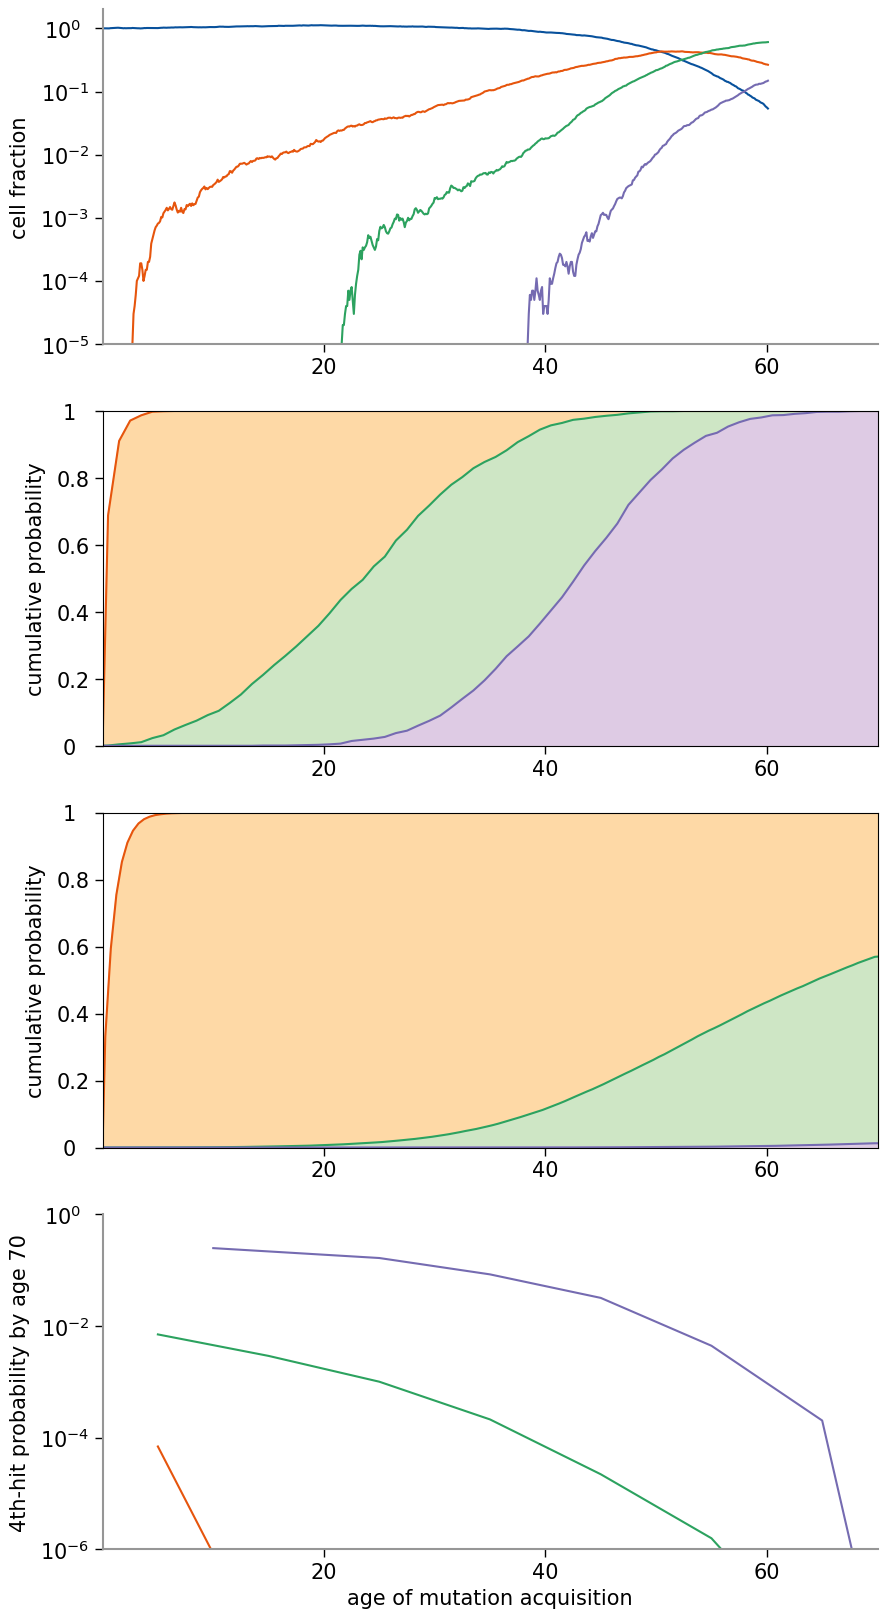

In [37]:
plt.clf()
plt.close('all')
f, ax1 = plt.subplots(4,1, figsize=(10,20))
font = {'weight' : 'normal','size'   : 16}
matplotlib.rc('font', **font)
f.subplots_adjust(hspace=0.4)


plot_waiting_times_for_mains_only_indexed(0, reinterpreted_dict)
plot_waiting_times(1, bin_centres , bin_centres ,bin_centres, cum_hist_t1_60_80 , cum_hist_t2_60_80 , cum_hist_t3_60_80 )
plot_waiting_times(2, bin_centres_no_conditioning , bin_centres_no_conditioning ,bin_centres_no_conditioning, cum_hist_t1_no_conditioning,cum_hist_t2_no_conditioning, cum_hist_t3_no_conditioning)
# ax1[2].set_xlabel('age', fontsize = 15)

plot_log_hist_data_for_fouth_hit_abs_risk_interpolated(3,list_of_abs_risk_single_khitlessthan70_finegrained, list_of_abs_risk_double_khitlessthan70_finegrained, list_of_abs_risk_triple_khitlessthan70_finegrained_merged)

plt.subplots_adjust(wspace=0, hspace=0.2)
# plt.savefig('AML_cumulative_risk/graphs/Figure5_s15p_10minus5_by_age_70_04122023_history4.pdf', bbox_inches='tight')

Observed epidemiological rates

In [102]:
cumulative_by_age = [ 4,
9,
14,
19,
24,
29,
34,
39,
44,
49,
54,
59,
64,
69,
74,
79
]

In [24]:
male_epidemiological_risk = [
0.00005,
0.00005,
0.0001,
0.00015,
0.0002,
0.00025,
0.0003,
0.00035,
0.00045,
0.00055,
0.0007,
0.00095,
0.0013,
0.00195,
0.00285,
0.0042]

In [25]:
female_epidemiological_risk = [
    0.00005,
0.00005,
0.0001,
0.00015,
0.0002,
0.00025,
0.0003,
0.00035,
0.00045,
0.00055,
0.0007,
0.0009,
0.0012,
0.0016,
0.00215,
0.00285
]